# Testing on single dataset

In [ ]:
import xarray as xr

In [3]:
ds = xr.open_dataset("../data_raw/c3slaiv3-global/c3s_LAI_19900710000000_GLOBE_AVHRR-NOAA11_V3.0.1.nc")

In [4]:
ds

<xarray.Dataset>
Dimensions:         (time: 1, lon: 10800, lat: 4200)
Coordinates:
  * time            (time) datetime64[ns] 1990-07-10
  * lon             (lon) float64 -180.0 -180.0 -179.9 ... 179.9 179.9 180.0
  * lat             (lat) float64 80.0 79.97 79.93 79.9 ... -59.9 -59.93 -59.97
Data variables:
    crs             |S1 ...
    LAI             (time, lat, lon) float32 ...
    LAI_ERR         (time, lat, lon) float32 ...
    retrieval_flag  (time, lat, lon) float64 ...
Attributes: (12/29)
    time_coverage_end:    1990-07-10T23:59:59Z
    time_coverage_start:  1990-06-20T00:00:00Z
    platform:             AVHRR2
    sensor:               NOAA11
    Conventions:          CF-1.6
    archive_facility:     VITO
    ...                   ...
    comment:              Please refer to Product user Guide for more informa...
    contact:              tip(at)FastOpt.com
    summary:              This file contains the Essential Climate Variable (...
    tiptable_version:     V1.3
    date_created:         2021-03-15
    tracking_id:          ef398629-0cf5-4dc3-a7bf-1e2e6be1fda2

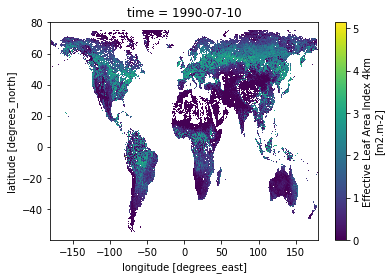

In [7]:
ds.LAI.plot()

# Testing on multiple datasets

In [1]:
import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean

In [2]:
from dask.distributed import Client
client = Client()
client

2022-07-06 01:09:16,382 - distributed.diskutils - INFO - Found stale lock file and directory '/home/anthony/Drive/Thesis/sandbox/testing_in_python/dask-worker-space/worker-q17gd_tu', purging
2022-07-06 01:09:16,382 - distributed.diskutils - INFO - Found stale lock file and directory '/home/anthony/Drive/Thesis/sandbox/testing_in_python/dask-worker-space/worker-8hu4j6rv', purging
2022-07-06 01:09:16,383 - distributed.diskutils - INFO - Found stale lock file and directory '/home/anthony/Drive/Thesis/sandbox/testing_in_python/dask-worker-space/worker-unc3mnuk', purging


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 12,Total memory: 15.48 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38485,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 12
Started: Just now,Total memory: 15.48 GiB
Comm: tcp://127.0.0.1:40495,Total threads: 3
Dashboard: http://127.0.0.1:37571/status,Memory: 3.87 GiB
Nanny: tcp://127.0.0.1:36717,


In [3]:
input_files = glob.glob("../data_raw/c3slaiv3-global/*.nc")
input_files.sort()
input_files

['../../data_raw/c3slaiv3-global/c3s_LAI_19900710000000_GLOBE_AVHRR-NOAA11_V3.0.1.nc',
 '../../data_raw/c3slaiv3-global/c3s_LAI_19910710000000_GLOBE_AVHRR-NOAA11_V3.0.1.nc',
 '../../data_raw/c3slaiv3-global/c3s_LAI_19920710000000_GLOBE_AVHRR-NOAA11_V3.0.1.nc',
 '../../data_raw/c3slaiv3-global/c3s_LAI_19930710000000_GLOBE_AVHRR-NOAA11_V3.0.1.nc',
 '../../data_raw/c3slaiv3-global/c3s_LAI_19940710000000_GLOBE_AVHRR-NOAA11_V3.0.1.nc',
 '../../data_raw/c3slaiv3-global/c3s_LAI_19950710000000_GLOBE_AVHRR-NOAA14_V3.0.1.nc',
 '../../data_raw/c3slaiv3-global/c3s_LAI_19960710000000_GLOBE_AVHRR-NOAA14_V3.0.1.nc',
 '../../data_raw/c3slaiv3-global/c3s_LAI_19970710000000_GLOBE_AVHRR-NOAA14_V3.0.1.nc',
 '../../data_raw/c3slaiv3-global/c3s_LAI_19980710000000_GLOBE_AVHRR-NOAA14_V3.0.1.nc',
 '../../data_raw/c3slaiv3-global/c3s_LAI_19990710000000_GLOBE_AVHRR-NOAA14_V3.0.1.nc',
 '../../data_raw/c3slaiv3-global/c3s_LAI_20000710000000_GLOBE_AVHRR-NOAA14_V3.0.1.nc',
 '../../data_raw/c3slaiv3-global/c3s_LAI_20

In [4]:
dsm = xr.open_mfdataset(input_files, chunks = {'time': '500MB'})

In [5]:
dsm

<xarray.Dataset>
Dimensions:         (time: 16, lon: 10800, lat: 4200)
Coordinates:
  * time            (time) datetime64[ns] 1990-07-10 1991-07-10 ... 2005-07-10
  * lon             (lon) float64 -180.0 -180.0 -179.9 ... 179.9 179.9 180.0
  * lat             (lat) float64 80.0 79.97 79.93 79.9 ... -59.9 -59.93 -59.97
Data variables:
    crs             (time) |S1 b'' b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
    LAI             (time, lat, lon) float32 dask.array<chunksize=(1, 4200, 10800), meta=np.ndarray>
    LAI_ERR         (time, lat, lon) float32 dask.array<chunksize=(1, 4200, 10800), meta=np.ndarray>
    retrieval_flag  (time, lat, lon) float64 dask.array<chunksize=(1, 4200, 10800), meta=np.ndarray>
Attributes: (12/29)
    time_coverage_end:    1990-07-10T23:59:59Z
    time_coverage_start:  1990-06-20T00:00:00Z
    platform:             AVHRR2
    sensor:               NOAA11
    Conventions:          CF-1.6
    archive_facility:     VITO
    ...                   ...
    comment:              Please refer to Product user Guide for more informa...
    contact:              tip(at)FastOpt.com
    summary:              This file contains the Essential Climate Variable (...
    tiptable_version:     V1.3
    date_created:         2021-03-15
    tracking_id:          ef398629-0cf5-4dc3-a7bf-1e2e6be1fda2

In [6]:
dsm.LAI

<xarray.DataArray 'LAI' (time: 16, lat: 4200, lon: 10800)>
dask.array<concatenate, shape=(16, 4200, 10800), dtype=float32, chunksize=(1, 4200, 10800), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1990-07-10 1991-07-10 ... 2005-07-10
  * lon      (lon) float64 -180.0 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * lat      (lat) float64 80.0 79.97 79.93 79.9 ... -59.87 -59.9 -59.93 -59.97
Attributes:
    long_name:      Effective Leaf Area Index 4km
    grid_mapping:   crs
    standard_name:  leaf_area_index
    units:          m2.m-2
    valid_range:    [    0 65534]

In [2]:
import numpy as np
np.ptp([-1,1,2,3])

4

In [7]:
def calc_ptp(da, dim):
    """Calculates the peak-to-peak difference (maximum - minimum)
        args:
            da (xarray.DataArray): DataArray
            dim (str): Dim
    """
    return (da.max(dim=dim) - da.min(dim=dim)).rename("calc_ptp")

In [8]:
lai_max = dsm['LAI'].max('time', keep_attrs=True)
lai_max

<xarray.DataArray 'LAI' (lat: 4200, lon: 10800)>
dask.array<_nanmax_skip-aggregate, shape=(4200, 10800), dtype=float32, chunksize=(4200, 10800), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -180.0 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * lat      (lat) float64 80.0 79.97 79.93 79.9 ... -59.87 -59.9 -59.93 -59.97
Attributes:
    long_name:      Effective Leaf Area Index 4km
    grid_mapping:   crs
    standard_name:  leaf_area_index
    units:          m2.m-2
    valid_range:    [    0 65534]

In [9]:
%%time
lai_max_done = lai_max.compute()

/home/anthony/anaconda3/envs/thesis/lib/python3.10/site-packages/dask/array/reductions.py:608: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/home/anthony/anaconda3/envs/thesis/lib/python3.10/site-packages/dask/array/reductions.py:608: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/home/anthony/anaconda3/envs/thesis/lib/python3.10/site-packages/dask/array/reductions.py:608: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/home/anthony/anaconda3/envs/thesis/lib/python3.10/site-packages/dask/array/reductions.py:608: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


CPU times: user 986 ms, sys: 348 ms, total: 1.33 s
Wall time: 7.29 s


In [10]:
lai_max.units

'm2.m-2'

In [21]:
dsm.attrs['source']

'Derived from EO satellite imagery'

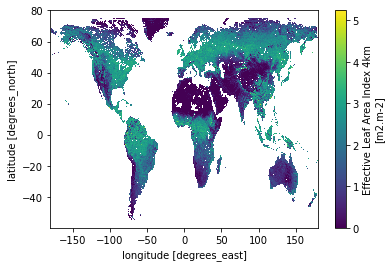

In [14]:
lai_max_done.plot()

In [ ]:
fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
lai_max_done.plot.contourf(ax=ax,
                         #levels=np.arange(0, 450, 50),
                         extend='max',
                         transform=ccrs.PlateCarree(),
                         cbar_kwargs={'label': lai_max.units},
                         cmap=cmocean.cm.haline_r)
ax.coastlines()

model = dset.attrs['source']
title = f'July 10 maximum LAI, 1990-2005 ({model})'
plt.title(title)

plt.show()

2022-07-06 01:08:56,459 - distributed.nanny - ERROR - Worker process died unexpectedly
2022-07-06 01:08:56,460 - distributed.nanny - ERROR - Worker process died unexpectedly
2022-07-06 01:08:56,460 - distributed.nanny - ERROR - Worker process died unexpectedly
2022-07-06 01:08:56,461 - distributed.nanny - ERROR - Worker process died unexpectedly
2022-07-06 01:08:56,461 - distributed.nanny - ERROR - Worker process died unexpectedly
2022-07-06 01:08:56,461 - distributed.nanny - ERROR - Worker process died unexpectedly
2022-07-06 01:08:56,462 - distributed.nanny - ERROR - Worker process died unexpectedly
2022-07-06 01:08:56,466 - distributed.nanny - ERROR - Worker process died unexpectedly


KeyboardInterrupt: 

2022-07-06 01:09:01,164 - distributed.nanny - WARNING - Restarting worker
2022-07-06 01:09:01,167 - distributed.nanny - WARNING - Restarting worker
2022-07-06 01:09:01,170 - distributed.nanny - WARNING - Restarting worker
2022-07-06 01:09:01,173 - distributed.nanny - WARNING - Restarting worker
2022-07-06 01:09:01,180 - distributed.nanny - WARNING - Restarting worker
2022-07-06 01:09:01,185 - distributed.nanny - WARNING - Restarting worker
2022-07-06 01:09:01,191 - distributed.nanny - WARNING - Restarting worker
2022-07-06 01:09:01,197 - distributed.nanny - WARNING - Restarting worker


In [ ]:
fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
lai_max_done.plot.contourf(ax=ax,
                         #levels=np.arange(0, 450, 50),
                         extend='max',
                         transform=ccrs.PlateCarree(),
                         cbar_kwargs={'label': lai_max.units},
                         cmap=cmocean.cm.haline_r)
ax.coastlines()

model = dset.attrs['source']
title = f'July 10 maximum LAI, 1990-2005 ({model})'
plt.title(title)

plt.show()

# Testing correlation

In [1]:
import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean

In [2]:
from dask.distributed import Client
client = Client()
client

2022-07-06 13:27:08,960 - distributed.diskutils - INFO - Found stale lock file and directory '/home/anthony/Drive/Thesis/sandbox/testing_in_python/dask-worker-space/worker-x_0a5kb7', purging
2022-07-06 13:27:08,960 - distributed.diskutils - INFO - Found stale lock file and directory '/home/anthony/Drive/Thesis/sandbox/testing_in_python/dask-worker-space/worker-ippx6qba', purging
2022-07-06 13:27:08,960 - distributed.diskutils - INFO - Found stale lock file and directory '/home/anthony/Drive/Thesis/sandbox/testing_in_python/dask-worker-space/worker-x937khp6', purging
2022-07-06 13:27:08,961 - distributed.diskutils - INFO - Found stale lock file and directory '/home/anthony/Drive/Thesis/sandbox/testing_in_python/dask-worker-space/worker-tdw4y0o4', purging


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 12,Total memory: 15.48 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40899,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 12
Started: Just now,Total memory: 15.48 GiB
Comm: tcp://127.0.0.1:33003,Total threads: 3
Dashboard: http://127.0.0.1:34573/status,Memory: 3.87 GiB
Nanny: tcp://127.0.0.1:46745,


In [2]:
msl_ds = xr.open_dataset("../data_raw/era5slvmonthly-costa/mslp.grib", 
                           chunks = {'time': '500MB'},
                           engine = "cfgrib")

Ignoring index file '../data_raw/era5slvmonthly-costa/mslp.grib.923a8.idx' incompatible with GRIB file


In [7]:
msl_ds

<xarray.Dataset>
Dimensions:     (time: 4608, latitude: 41, longitude: 41)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 1990-01-01 ... 2005-12-01T23:00:00
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 17.0 16.75 16.5 16.25 ... 7.75 7.5 7.25 7.0
  * longitude   (longitude) float64 -91.0 -90.75 -90.5 ... -81.5 -81.25 -81.0
    valid_time  (time) datetime64[ns] dask.array<chunksize=(4608,), meta=np.ndarray>
Data variables:
    msl         (time, latitude, longitude) float32 dask.array<chunksize=(4608, 41, 41), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-07-06T13:42 GRIB to CDM+CF via cfgrib-0.9.1...

In [3]:
lat_bins = msl_ds["latitude"].data
lat_bins.sort()
lat_bins

array([ 7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,  9.  ,
        9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  , 11.25,
       11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  , 13.25, 13.5 ,
       13.75, 14.  , 14.25, 14.5 , 14.75, 15.  , 15.25, 15.5 , 15.75,
       16.  , 16.25, 16.5 , 16.75, 17.  ])

In [4]:
lon_bins = msl_ds["longitude"].data
lon_bins

array([-91.  , -90.75, -90.5 , -90.25, -90.  , -89.75, -89.5 , -89.25,
       -89.  , -88.75, -88.5 , -88.25, -88.  , -87.75, -87.5 , -87.25,
       -87.  , -86.75, -86.5 , -86.25, -86.  , -85.75, -85.5 , -85.25,
       -85.  , -84.75, -84.5 , -84.25, -84.  , -83.75, -83.5 , -83.25,
       -83.  , -82.75, -82.5 , -82.25, -82.  , -81.75, -81.5 , -81.25,
       -81.  ])

In [5]:
lai_files = glob.glob("../data_raw/c3slaiv3-global/*.nc")
lai_files.sort()
lai_files

['../data_raw/c3slaiv3-global/c3s_LAI_19900710000000_GLOBE_AVHRR-NOAA11_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_19910710000000_GLOBE_AVHRR-NOAA11_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_19920710000000_GLOBE_AVHRR-NOAA11_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_19930710000000_GLOBE_AVHRR-NOAA11_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_19940710000000_GLOBE_AVHRR-NOAA11_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_19950710000000_GLOBE_AVHRR-NOAA14_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_19960710000000_GLOBE_AVHRR-NOAA14_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_19970710000000_GLOBE_AVHRR-NOAA14_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_19980710000000_GLOBE_AVHRR-NOAA14_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_19990710000000_GLOBE_AVHRR-NOAA14_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_20000710000000_GLOBE_AVHRR-NOAA14_V3.0.1.nc',
 '../data_raw/c3slaiv3-global/c3s_LAI_20010710000000_GLOBE_AVHRR-NOAA16_V3.0

In [6]:
lai_ds = xr.open_mfdataset(lai_files, 
                           chunks = {'time': '500MB'},
                           engine = "netcdf4")

In [22]:
lai_ds

<xarray.Dataset>
Dimensions:         (time: 16, lon: 10800, lat: 4200)
Coordinates:
  * time            (time) datetime64[ns] 1990-07-10 1991-07-10 ... 2005-07-10
  * lon             (lon) float64 -180.0 -180.0 -179.9 ... 179.9 179.9 180.0
  * lat             (lat) float64 80.0 79.97 79.93 79.9 ... -59.9 -59.93 -59.97
Data variables:
    crs             (time) |S1 b'' b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
    LAI             (time, lat, lon) float32 dask.array<chunksize=(1, 4200, 10800), meta=np.ndarray>
    LAI_ERR         (time, lat, lon) float32 dask.array<chunksize=(1, 4200, 10800), meta=np.ndarray>
    retrieval_flag  (time, lat, lon) float64 dask.array<chunksize=(1, 4200, 10800), meta=np.ndarray>
Attributes: (12/29)
    time_coverage_end:    1990-07-10T23:59:59Z
    time_coverage_start:  1990-06-20T00:00:00Z
    platform:             AVHRR2
    sensor:               NOAA11
    Conventions:          CF-1.6
    archive_facility:     VITO
    ...                   ...
    comment:              Please refer to Product user Guide for more informa...
    contact:              tip(at)FastOpt.com
    summary:              This file contains the Essential Climate Variable (...
    tiptable_version:     V1.3
    date_created:         2021-03-15
    tracking_id:          ef398629-0cf5-4dc3-a7bf-1e2e6be1fda2

In [7]:
lai_da = lai_ds["LAI"].sel(lat = slice(17, 7), lon = slice(-91, -81))

In [24]:
lai_da

<xarray.DataArray 'LAI' (time: 16, lat: 300, lon: 300)>
dask.array<getitem, shape=(16, 300, 300), dtype=float32, chunksize=(1, 300, 300), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1990-07-10 1991-07-10 ... 2005-07-10
  * lon      (lon) float64 -90.97 -90.93 -90.9 -90.87 ... -81.07 -81.03 -81.0
  * lat      (lat) float64 16.97 16.93 16.9 16.87 16.83 ... 7.1 7.067 7.033 7.0
Attributes:
    long_name:      Effective Leaf Area Index 4km
    grid_mapping:   crs
    standard_name:  leaf_area_index
    units:          m2.m-2
    valid_range:    [    0 65534]

In [30]:
lai_da.groupby_bins("lat", lat_bins).mean()

,Array,Chunk
Bytes,750.00 kiB,1.17 kiB
Shape,"(16, 40, 300)","(1, 1, 300)"
Count,3904 Tasks,640 Chunks
Type,float32,numpy.ndarray


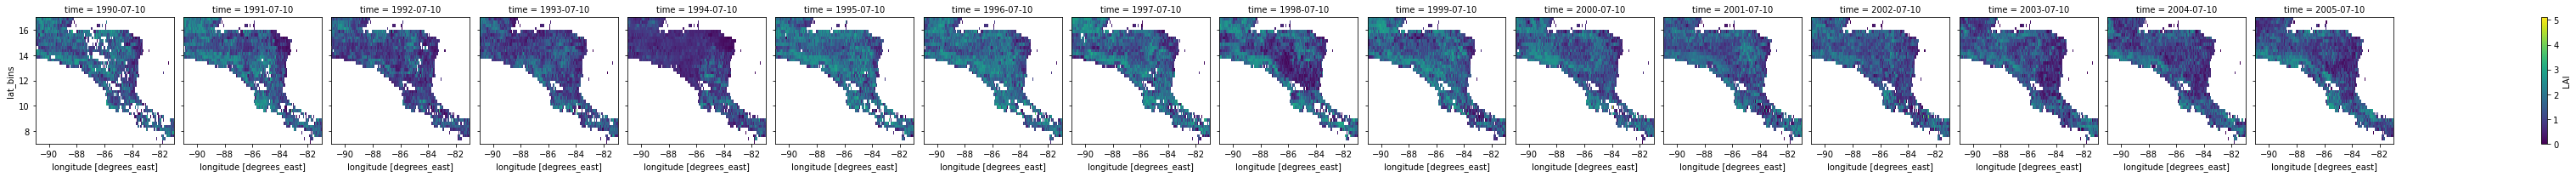

In [36]:
lai_da.groupby_bins("lat", lat_bins).mean().plot(col="time")

In [31]:
lai_da.groupby_bins("lon", lon_bins).mean()

,Array,Chunk
Bytes,750.00 kiB,1.17 kiB
Shape,"(16, 300, 40)","(1, 300, 1)"
Count,3264 Tasks,640 Chunks
Type,float32,numpy.ndarray


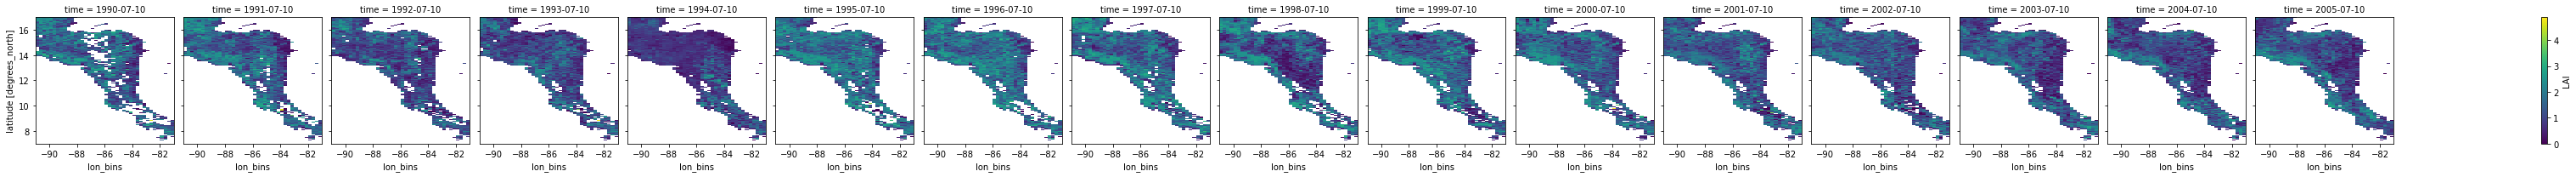

In [37]:
lai_da.groupby_bins("lon", lon_bins).mean().plot(col="time")

In [32]:
lai_da.groupby_bins("lat", lat_bins).groupby_bins("lon", lon_bins).mean()

AttributeError: 'DataArrayGroupBy' object has no attribute 'groupby_bins'

In [39]:
%%time
lai_da.groupby_bins("lat", lat_bins).mean().groupby_bins("lon", lon_bins).mean()

CPU times: user 232 ms, sys: 5.5 ms, total: 238 ms
Wall time: 228 ms


,Array,Chunk
Bytes,100.00 kiB,4 B
Shape,"(16, 40, 40)","(1, 1, 1)"
Count,131904 Tasks,25600 Chunks
Type,float32,numpy.ndarray


CPU times: user 31.7 s, sys: 561 ms, total: 32.2 s
Wall time: 32.1 s


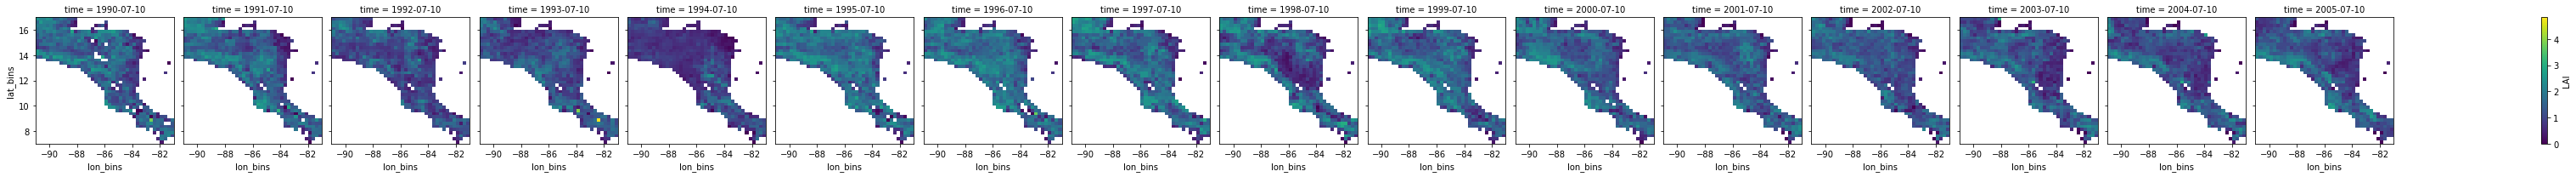

In [40]:
%%time
lai_da.groupby_bins("lat", lat_bins).mean().groupby_bins("lon", lon_bins).mean().plot(col="time")

In [11]:
stacked = lai_da.stack(gridcell=["lat","lon"])
stacked.groupby("gridcell").mean().unstack("gridcell")

KeyboardInterrupt: 

In [44]:
lai_da.coarsen(lat=15, lon=15, boundary="pad", side="right").mean()

<xarray.DataArray 'LAI' (time: 16, lat: 20, lon: 20)>
dask.array<mean_agg-aggregate, shape=(16, 20, 20), dtype=float32, chunksize=(1, 20, 20), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1990-07-10 1991-07-10 ... 2005-07-10
  * lon      (lon) float64 -90.73 -90.23 -89.73 -89.23 ... -82.23 -81.73 -81.23
  * lat      (lat) float64 16.73 16.23 15.73 15.23 ... 8.733 8.233 7.733 7.233
Attributes:
    long_name:      Effective Leaf Area Index 4km
    grid_mapping:   crs
    standard_name:  leaf_area_index
    units:          m2.m-2
    valid_range:    [    0 65534]

In [67]:
lai_da.pad(pad_width = {"lat": (1,0), "lon": (1,0)}, mode = "linear_ramp", end_values = {"lat": (17, 7), "lon": (91, 81)})

<xarray.DataArray 'LAI' (time: 16, lat: 301, lon: 301)>
dask.array<concatenate, shape=(16, 301, 301), dtype=float32, chunksize=(1, 300, 300), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1990-07-10 1991-07-10 ... 2005-07-10
  * lon      (lon) float64 nan -90.97 -90.93 -90.9 ... -81.1 -81.07 -81.03 -81.0
  * lat      (lat) float64 nan 16.97 16.93 16.9 16.87 ... 7.1 7.067 7.033 7.0

In [70]:
lai_da.pad(lon=(1,3), linear_ramp = (91,82))

<xarray.DataArray 'LAI' (time: 16, lat: 300, lon: 304)>
dask.array<concatenate, shape=(16, 300, 304), dtype=float32, chunksize=(1, 300, 300), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1990-07-10 1991-07-10 ... 2005-07-10
  * lon      (lon) float64 nan -90.97 -90.93 -90.9 -90.87 ... -81.0 nan nan nan
  * lat      (lat) float64 16.97 16.93 16.9 16.87 16.83 ... 7.1 7.067 7.033 7.0

## Troubles due to floating points

In [71]:
lai_da.lon.data

array([-90.96666676, -90.93333342, -90.90000009, -90.86666676,
       -90.83333342, -90.80000009, -90.76666676, -90.73333342,
       -90.70000009, -90.66666676, -90.63333342, -90.60000009,
       -90.56666676, -90.53333342, -90.50000009, -90.46666676,
       -90.43333342, -90.40000009, -90.36666676, -90.33333342,
       -90.30000009, -90.26666676, -90.23333342, -90.20000009,
       -90.16666676, -90.13333342, -90.10000009, -90.06666676,
       -90.03333342, -90.00000009, -89.96666676, -89.93333342,
       -89.90000009, -89.86666676, -89.83333342, -89.80000009,
       -89.76666676, -89.73333342, -89.70000009, -89.66666676,
       -89.63333342, -89.60000009, -89.56666676, -89.53333342,
       -89.50000009, -89.46666676, -89.43333342, -89.40000009,
       -89.36666676, -89.33333342, -89.30000009, -89.26666676,
       -89.23333342, -89.20000009, -89.16666676, -89.13333342,
       -89.10000009, -89.06666676, -89.03333342, -89.00000009,
       -88.96666676, -88.93333342, -88.90000009, -88.86

In [169]:
msl_ds["msl"].coarsen(latitude=2, longitude=2, boundary="trim").mean()

<xarray.DataArray 'msl' (time: 4608, latitude: 20, longitude: 20)>
dask.array<mean_agg-aggregate, shape=(4608, 20, 20), dtype=float32, chunksize=(4608, 20, 20), chunktype=numpy.ndarray>
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 1990-01-01 ... 2005-12-01T23:00:00
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 7.125 7.625 8.125 8.625 ... 15.62 16.12 16.62
  * longitude   (longitude) float64 -90.88 -90.38 -89.88 ... -81.88 -81.38
    valid_time  (time) datetime64[ns] dask.array<chunksize=(4608,), meta=np.ndarray>
Attributes:
    GRIB_paramId:                             151
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1681
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgua
    GRIB_gridType:                            regular_ll
    GRIB_NV:                                  0
    GRIB_Nx:                                  41
    GRIB_Ny:                                  41
    GRIB_cfName:                              air_pressure_at_mean_sea_level
    GRIB_cfVarName:                           msl
    GRIB_gridDefinitionDescription:           Latitude/Longitude Grid
    GRIB_iDirectionIncrementInDegrees:        0.25
    GRIB_iScansNegatively:                    0
    GRIB_jDirectionIncrementInDegrees:        0.25
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   17.0
    GRIB_latitudeOfLastGridPointInDegrees:    7.0
    GRIB_longitudeOfFirstGridPointInDegrees:  -91.0
    GRIB_longitudeOfLastGridPointInDegrees:   -81.0
    GRIB_missingValue:                        9999
    GRIB_name:                                Mean sea level pressure
    GRIB_shortName:                           msl
    GRIB_totalNumber:                         0
    GRIB_units:                               Pa
    long_name:                                Mean sea level pressure
    units:                                    Pa
    standard_name:                            air_pressure_at_mean_sea_level

In [74]:
msl_ds.longitude.data

array([-91.  , -90.75, -90.5 , -90.25, -90.  , -89.75, -89.5 , -89.25,
       -89.  , -88.75, -88.5 , -88.25, -88.  , -87.75, -87.5 , -87.25,
       -87.  , -86.75, -86.5 , -86.25, -86.  , -85.75, -85.5 , -85.25,
       -85.  , -84.75, -84.5 , -84.25, -84.  , -83.75, -83.5 , -83.25,
       -83.  , -82.75, -82.5 , -82.25, -82.  , -81.75, -81.5 , -81.25,
       -81.  ])

In [80]:
format(lai_da.lon.data[-1])

'-81.00000009902146'

In [83]:
round(lai_da.lon.data[-1],2)

-81.0

In [84]:
msl_ds.longitude.data[-1]

-81.0

In [161]:
lai_da_downsamp = (lai_da
                   .coarsen(lat=3, lon=3)
                   .mean())

lai_da_downsamp = (lai_da_downsamp
                   .assign_coords({
                       "lat" : np.round(lai_da_downsamp.lat - 1/30, 2),
                       "lon" : np.round(lai_da_downsamp.lon + 1/30, 2)})
                   .pad(pad_width = {"lat": (1, 0), "lon": (1, 0)}, mode = "constant", constant_values = {"lat": (0, 0), "lon": (0, 0)}))

lai_da_downsamp = (lai_da_downsamp
                   .assign_coords({
                       "lat" : lai_da_downsamp.lat.isel(lat = slice(1, None)).pad(lat=(1,0), constant_values=(17,0)),
                       "lon" : lai_da_downsamp.lon.isel(lon = slice(1, None)).pad(lon=(1,0), constant_values=(-91,0))}))

In [162]:
lai_da_downsamp

<xarray.DataArray 'LAI' (time: 16, lat: 101, lon: 101)>
dask.array<concatenate, shape=(16, 101, 101), dtype=float32, chunksize=(1, 100, 100), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1990-07-10 1991-07-10 ... 2005-07-10
  * lon      (lon) float64 -91.0 -90.9 -90.8 -90.7 ... -81.3 -81.2 -81.1 -81.0
  * lat      (lat) float64 17.0 16.9 16.8 16.7 16.6 16.5 ... 7.4 7.3 7.2 7.1 7.0

In [165]:
lai_da_downsamp.coarsen(lat=5, lon=5, boundary = "pad").mean()

<xarray.DataArray 'LAI' (time: 16, lat: 21, lon: 21)>
dask.array<mean_agg-aggregate, shape=(16, 21, 21), dtype=float32, chunksize=(1, 20, 20), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1990-07-10 1991-07-10 ... 2005-07-10
  * lon      (lon) float64 -90.8 -90.3 -89.8 -89.3 ... -82.3 -81.8 -81.3 -81.0
  * lat      (lat) float64 16.8 16.3 15.8 15.3 14.8 14.3 ... 8.8 8.3 7.8 7.3 7.0

In [11]:
client.close()

## Coordinates for ERA5 define the top left of each grid cell but coordinate inputs for xarray plot define the middle of each grid cell

In [171]:
a0 = xr.DataArray(np.zeros((4, 3, 2)), dims=("y", "x", "z"), coords={"y": [10, 20, 30, 40], "x": [100, 200, 300], "z": [1000, 2000]}, name="temperature")

a0[0, 0, 0] = 1

a = a0.isel(z=0)

a

<xarray.DataArray 'temperature' (y: 4, x: 3)>
array([[1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])
Coordinates:
  * y        (y) int64 10 20 30 40
  * x        (x) int64 100 200 300
    z        int64 1000

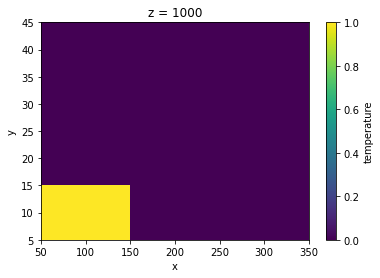

In [172]:
a.plot()

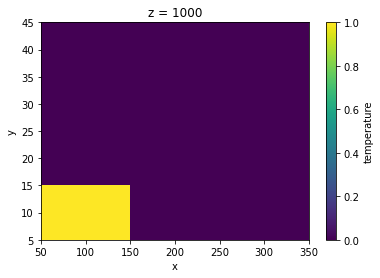

In [173]:
a.plot.pcolormesh()

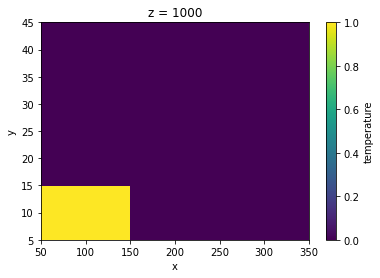

In [174]:
a.plot.imshow()